# Pertemuan 11 Data Science 13
## Sumber : https://youtu.be/Sj1ybuDDf9I
## Classification Task dengan Naive Bayes

### Bayes' Theorem
Bayes' Theorem menawarkan suatu formula untuk menghitung nilai probability dari suatu event dengan memanfaatkan pengetahuan sebelumnya dari kondisi terkait; atau sering kali dikenal denga istilah conditional probability.

### $P(A|B) = \frac{P(A|B) \times P(A)}{P(B)}$
### $P(y|X) = \frac{P(X|y) \times P(y)}{P(X)}$
### $Posterior = \frac{Likelihood \times Prior}{Evidence}$

### Pengenalan Naive Bayes Classification
Studi Kasus 1
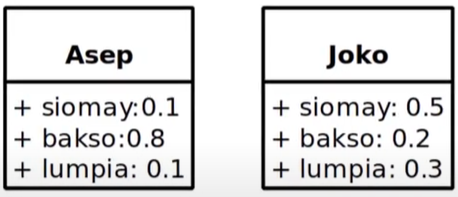

Misi : lakukan prediksi siapa pelanggan yang melakukan pemesanan dengan diketahui pesananya adalah lumpia dan bakso

#### Prior Porbability : $P(y)$
- prior adalah nilai probability kemunculan sebuah nilai target tertentu tanpa melihat nilai feature. nilai akan bergantung pada dataset.
- $P(Asep) = 0.5$
- $P(Joko) = 0.5$

#### Likelihood : $P(X|y)$
- likelihood pada prior probablity dapat dilihat dari kemunculan nilai feature tertentu bila diketahui nilai target labelnya
- Asep :
    ### $P(lumpia, bakso|Asep) = (0.1 \times 0.8) = 0.08$
- Joko :
    ### $P(lumpia,bakso|Joko) = (0.3 \times 0.2) = 0.06$
    
#### Evidance atau Normalizer : $P(X)$
   ### $Evicende = \sum(likelihood \times Prior)$ 
   ### $P(lumpia, bakso) = (0.08 \times 0.5) + (0.06 \times 0.5) = 0.07$
   - mengmabil dari likelihoodnya asep dan joko dan dikalikan dengan prior porbability
   
#### Posterior Probability : $P(y|X)$
- Formula :
    ### $Posterior = \frac{Likelihood \times Prior}{Evidence}$
- Asep :
    ### $P(Asep|lumpia, bakso) = \frac{0.08 \times 0.5}{0.07} = 0.57 $
- Joko :
    ### $P(Joko|lumpia,bakso) = \frac{0.06 \times 0.5}{0.07} = 0.43$

### Studi Kasus 2
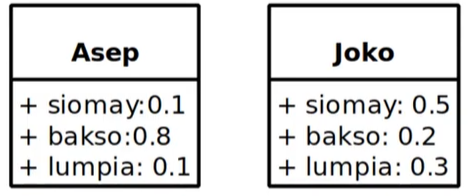

Misi : lakukan prediksi siapa pelanggan yang melakukan pemesanan dengan diketahui pesanannya adalah siomay dan bakso

#### Posterior Porbability : $P(y|X)$ *(Kasus 2)*
- Pesanan : Siomai, bakso
- Envidence : __$P(X)$__
    ### - $P(siomay,bakso) = (0.1 \times 0.8 \times 0.5) + (0.5 \times 0.2 \times 0.5) = 0.09$
    
- Asep :
    ### -  $P(Asep|siomay,bakso) =\frac{(0.1 \times 0.8) \times 0.5}{0.09} = 0.444$
- Joko :
    ### - $P(Joko|siomay,bakso) = \frac{(0.5 \times 0.2)\times 0.5}{0.09} = 0.555$

### Mengapa disebut Naive?
- karena sekatu kita mendefinisikan likelihood 
 #### $P(lumpia, bakso|asep),$
- kita mengansumsikan $P(lumpia|asep$ conditionally independent terhadap $P(bakso|asep)$; demikian sebaliknya.
- sehingga dapat diformulasikan sebagai berikut :

### $P(lumpia,bakso|asep) = P(lumpia|Asep) \times P(bakso|Asep)$
- karena pemesanan lumpia oleh asep tidak dipengaruhi oleh pesanan bakso oleh asep, yang sebenarnya ada kemungkinan saling berhubungan maka dari itu disebut naive.

### Dataset: Breast Cancer Wisconsin (Diagnostic)

#### Load Dataset

In [1]:
from sklearn.datasets import load_breast_cancer
print(load_breast_cancer().DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

- DESCR digunakan untuk diagnostic
- supaya dapat melihat deskripsi.

In [3]:
load_breast_cancer?
#X, y = load_breast_cancer(return_X_y=True)
#X.shape

cara mengakses dataset.
- kita bisa mengakses dokumentasi, dari fungsi breast cancer dengan menggunakan tanda tanya (?).
- tanda (?) digunakan untuk melihat kegunaan fungsi tersebut.

- return X_y digunakan untuk membagi dan memisahkan label data dengan feature data.

In [4]:
# load_breast_cancer?
X, y = load_breast_cancer(return_X_y=True)
X.shape

(569, 30)

### Training & Testing Set

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)
print(f'X_train shape {X_train.shape}')
print(f'X_test shape {X_test.shape}')

X_train shape (455, 30)
X_test shape (114, 30)


- `test_size` digunakan untuk mengalokasikan testing dataset.
- fungsi `train_test_split` akan digunakan untuk mengembalikan kepada 4 variable

### Naive Bayes dengan Scikit Learn

In [9]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9298245614035088

In [10]:
model.score(X_test, y_test)

0.9298245614035088

melakukan klasisifikasi dengan Naive Bayes :
- `GaussianNB`, `NB`nya adalah Naive Bayes.
- model akan di training dengan menggunakan `.fit`
- lalu